<div class='alert alert-success'>
<h2 align="center"; style="font-size: 60px; font-weight: bold;">Vacation Planner Program Assignment Report</h2> 
<h3 align="center"; style="font-size: 30px;">Case Study of Different Genetic Algorithm's Evolution Functions with Comparisons Analysis</h3>
</div>

# **Introduction and Problem Statement**
<div style="text-align: justify">
    This project is an application based study on genetic algorithm given a problem of developing a vacation planner with limited range of budget expenses. In the end, a research based study is carried out to analyse different evolution methods with comparisons. Genetic algorithm is widely used in different fields. For instance, genetic algoritm can be used in game theory equilibrium resolution, cobweb model, asset pricing, DNA structure analysis and many more. This algorithm represents the flow of natural selection which the fittest individuals are chosen for reproduction. With this natural instinct, stronger and more competent offspring will be produced for the next generation. As the generation goes by, the offspring will become more and more fit.
</div>

<img style="max-width:20%;" src="Components/chart.png">

<br>
<div style="text-align: justify">
    Generally, genetic algorithm consists of 5 stages which are population and individuals initialization, fitness score evaluation and evolution method which consists of selection, crossover and mutation. In this project, a vacation planner program is created to take in different types of parameters depending on the scenarios. Outputs may be vary every time you run it.
</div>
<br>
Example:
    
    a. Estimated Total Expenses (Target): < RM 3000
    b. Vacation Duration: 5 days
    c. Hotel Price per Night: < RM 300
    d. Tourists Spots to Visit: 6 spots
    e. Price per Spot: < RM 300
    f. Food Price per Day: < RM 100
    g. Trips Price per Day: 500

### !!! INSTRUCTIONS !!!

    1. Nothing especially complicated just run every cell in order.
    2. If you want to look back some outputs n visualization
        a. To run for different outputs. Run cell that has --> ## Run this cell to view for the outputs of the implementation
        b. To run for visualization. Run cell that has --> # Visualization
    3. To understand more, look at the markdown cells for more information on the process and function used.
    4. For parameters inputs, there are 2 sets of default parameters given.
    5. If want to use the default parameters, uncomment either one set.
    6. If want to have self customized parameters, uncomment the code block that is labeled --> ## Customize 

## Import Relevant Package

In [1]:
import numpy as np 
from random import randint
import random
import copy
import time

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import seaborn as sns; sns.set()

## Individual and Population Initiation

An individual is represented by a set of variables known as Genes, 0,1,1,0,1... When genes joined together, they form a Chromosome, [0,1,1,0,1]. 

<img style="max-width:35%;" src="Components/indie.png">
<br>

Step 1.) Generate Population of individuals with the parameters:
   
    a.) number of days
    b.) number of spots
    c.) hotel price per night
    d.) one spot price
    e.) meal price per day
    f.) trip price per day
    
After that, it will generate a list of lists containing numbers and the size is depending on the counts. Below is an example with: 
    
    size / counts of 3
    5 days
    10 spots
    hotel price with < 300
    one spot price with < 200
    meal price per day with < 50
    trip price per day with < 300
    
* [[956, 1420, 210, 1250], [596, 1700, 120, 1238], [976, 1750, 125, 1278]]

Take the first list for example, RM 956 represent the hotel price, in this case can be divided by 4 nights (5 days - 1) = RM 239 per night which is precisely less than RM 300.

RM 1420 is the total spots price, in this case to break it down would be meaningless since the we dont know the exact spot price but the average spot price is RM 142 which is less than RM 200.

RM 210 is meal price, similar situation with the spots, all meals prices are not evenly distributed so it's meaningless to break it down. RM 210 divided by 5 days is RM 42 a day which is less than RM 50.

Finally, RM 1250 is the trips price. Divided by 5 days is RM 250 which less than RM 300 a day.

For the prices of spots, meals and trips, the output combination later will not show the break down for each amount since the every meal, spot and trips are not the same. So it is optimal to give the total amount of each day for the users to have their freedom to spend the expenses within the range of number given wisely.

In [2]:
def individual(days, spots, night_price, spot_price, meal_price, trip_price):
    d_price = randint(50,night_price)*(days-1)
    s_price = randint(50,spot_price)*spots
    m_price = randint(20,meal_price)*days
    t_price = randint(50,trip_price)*days
    return [d_price, s_price, m_price, t_price]

def population(count, days, spots, night_price, spot_price, meal_price, trip_price):
    return [individual(days, spots, night_price, spot_price, meal_price, trip_price) for x in range(count)]

## Fitness Score
Step 2.) Define the fitness function, to evaluate how fit the population is, we calculate the distance between the targeted expenses and the total of the individual. The further the distance is, the less fit the individual is. If the distance is in negative value, we return a very large number which is 10 000, so that in the evolution method later on will not choose this sets of population.

In [3]:
# 2. Fitness
def fitness(individual, target):
    total = sum(individual)
    if (target-total) < 0:
        return 10000
    return abs(target-total)

def grade(pop,target):
    summed = [sum(i)-target for i in pop]
    return abs( sum(summed) / len(pop))

## Parameters Inputs
Step 3.) After defining our population of indivuals and fitness score for grading purose, it is time to insert some parameters, you can customize the paramter inputs. However, two sets of default paramters are given. To use them, please uncomment them and comment the other sections.

In [4]:
## Sample Default 1 
target = 2000
count = 200
days = 5
spots = 5
night_price = 200
spot_price = 100
meal_price = 50
trip_price = 200

## Sample Default 2
#target = 15000
#count = 200
#days = 10
#spots = 15
#night_price = 500
#spot_price = 550
#meal_price = 150
#trip_price = 500

## Customize 
#target = int(input("Estimated Budget (RM): "))
#count = 200
#days = int(input("Vacation Duration (days): "))
#spots = int(input("Number of Tourist Spots: "))
#night_price = int(input("Hotel Price per Night (RM): "))
#spot_price = int(input("Price per Spot (RM): "))
#meal_price = int(input("Meal Price per Day (RM): "))
#trip_price = int(input("Trip Price per Day (RM): "))

In [60]:
print("""
target = {}
count = {}
days = {}
spots = {}
Hotel rental price = {}
Spots price = {}
Meal price = {}
Trip price = {}
""".format(target, count, days, spots, night_price, spot_price, meal_price, trip_price))


target = 2000
count = 200
days = 5
spots = 5
Hotel rental price = 200
Spots price = 100
Meal price = 50
Trip price = 200



## Default Evolution
Step 4.) This is a very simple sample evolution method that was adopted from my A.I subject lab's session. It uses Truncation selection, it sorts the population from fittest to weakest. Then a certain percentage is choosen from the population fittest side and add into the parent list. Next, randomly chooses some from the population disregarding their fitness score to diverse the genetic. 

Furthermore, single point crossover is used to cross over two parents to produce off springs that inherit from their genes. 

Lastly, Random min-max mutation is implemented here to randomly choose the position of individual's gene that needs to be mutate with some probability for variety purposes.

In [43]:
def evolve(pop, target, retain=0.2, random_select=0.05, mutate=0.01):
    
    # Truncation
    graded = [(fitness(x, target),x) for x in pop]
    graded = [x[1] for x in sorted(graded)] # x[1] because x has two components. 
    # just take the list --> [(50, [41, 38,86, 30, 55])]
    retain_length = int(len(graded)*retain) # how many top % parents to be remained
    parents = graded[0:retain_length] # get the list of array of individuals as parents - after sorted
    # randomly add other individuals to promote genetic diversity
    for individual in graded[retain_length:]: 
        if random_select > random.random():
            parents.append(individual)
    
    # Single point crossover
    parents_length = len(parents) # get parents' list length
    desired_length = len(pop) - parents_length # desired length for crossover
    children = [] # Next off spring
    while len(children) < desired_length:
        # Random choose paternal and maternal parents
        male = randint(0, parents_length-1) 
        female = randint(0, parents_length-1)
        if male != female:
            male = parents[male]
            female = parents[female]
            half = int(len(male)/2) # Crossover half of father and the other half from mother
            child = male[:half]+female[half:] # Combine together 
            children.append(child)
    
    parents.extend(children)
    
    # Random min-max mutation
    for individual in parents:
        if mutate > random.random():
            pos_to_mutate = randint(0, len(individual)-1)
            # this mutate is not ideal, because it
            # restricts the range of possible values,
            # but the function is unaware of the min/max
            # values used to create the individuals,
            individual[pos_to_mutate] = randint(min(individual), max(individual))

    return parents

## Results and Outputs
For the outputs, a combination of expenses is generated for the user to plan their vacation spendings. Below is an example. Expected expenses is RM 2000. After the computation, we have our total expenses is RM 1999, which is less than RM 2000. Very closed to RM 2000 which is good, it means that the program optimizes the spending to the max. Next, hotel rental price for total 4 nights which is RM 182.25 per night, times with 4 nights. Total 5 spots price is RM 380. Total meals price for 5 days is RM 125, so divide by 5 to see the average meal price for a day. Lastly, total trips price per day is RM 153.

Example:

    Total Expenses: RM 1999  
    Hotel rental price for total 4 nights: RM 182.25 * 4 nights
    Total 5 spots price: RM 380
    Total meals price for 5 days: RM 125
    Total trips price per day: RM 153.0 * 5 days
    
Outputs may be vary every time you run it.

In [44]:
## Run this cell to view for the outputs of the implementation
value_lst =[]
fitness_history = []

n_generation = 100

p = population(count, days, spots, night_price, spot_price, meal_price, trip_price)

for i in range(n_generation): # Loop the generation
    p = evolve(p, target) # Evolution of generation
    value = grade(p, target)
    fitness_history.append(value)
    value_lst.append(p[0])
    value_lst.append(value)

summ1 = sum(value_lst[-2]) # Final estimated total expense
final1 = value_lst[-2]

nights = days - 1
print(
"""  
Total Expenses: RM {}  
Hotel rental price for total {} nights: RM {} * {} nights
Total {} spots price: RM {}
Total meals price for {} days: RM {}
Total trips price per day: RM {} * {} days
""".format(summ1, nights, final1[0]/nights, nights, spots, final1[1], days, final1[2], final1[3]/days, days))

  
Total Expenses: RM 1999  
Hotel rental price for total 4 nights: RM 182.25 * 4 nights
Total 5 spots price: RM 380
Total meals price for 5 days: RM 125
Total trips price per day: RM 153.0 * 5 days



## Visualization
This is a visualization on fitness score across generation using a line plot. We can see the trend is as the generation goes by, the fitness score keeps getting lower and lower until it gets near to 0. As explained, the lower the fitness score is, the more fit the individual is. This graph shows the individual keeps getting better and better across the generation. Generally, this project's genetic algorithm graph should have this trend. If it possesses other patterns, there is a problem with the algorithm itself.

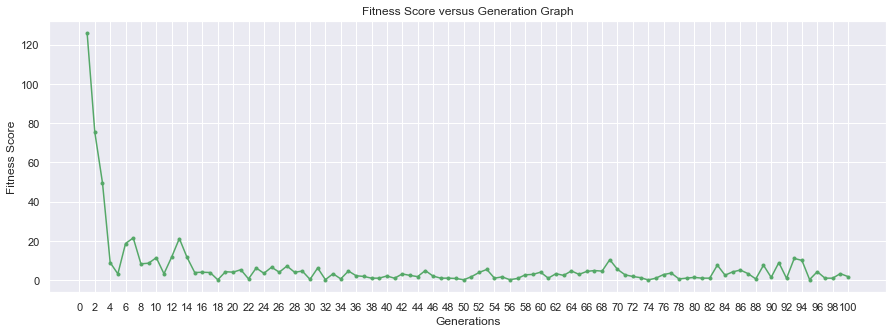

In [45]:
# Visualization
x = [y+1 for y in range(n_generation)]
ticks = [y*2 for y in range(51)]

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(x, fitness_history, 'g.-')
ax.set_xticks(ticks)
ax.set_xlabel("Generations")
ax.set_ylabel("Fitness Score")
ax.set_title('Fitness Score versus Generation Graph');
plt.show() 

# **Different Evolution Methods Comparison Analysis**

## Selection Methods
First and foremost, three selection methods will be compared with the same crossover and mutation methods being used in the default version above. The selection methods are:
* Tournament Selection
* Roulette Wheel Selection
* Stochastic Universal Sampling

1.) Tournament Selection <br>
    In this selection method, a K numbers of partition are divided among the individuals equally. Then in every group, the fittest individual is chosen and add to the parent lists for the next evolution method. This method is fairly easy to implement and it is quite fast in speed.

2.) Roulette Wheel Selection <br>
    This selection method adopts the roulette wheel casino game or a simpler example, a fortune wheel. We can visualize this in a round plane. The plane has many slots and the slots are the individual. The size of the slots depend on the fitness score of the individuals, the fitter the individual, the larger the slot is. Then, there is a ball bearing used to decide which individual is chosen depending on which slot it lands on. This ball bearing is implemented using a probability method. This selection method is quite complex but it has some qualities that are worth researching. It provides wide diversity.

3.) Stochastic Universal Sampling <br>
    This selection method is an extension of roulette wheel selection. Instead of having one stopping point. This method can have more than one, in this case 2 stopping points are implemented. With this method, more individuals are selected to be parents and the diversity is expanded wider. 

In [5]:
def tournament(pop, target, retain):
    graded = [(fitness(x, target),x) for x in pop]
    temp_graded = copy.deepcopy(graded)
    temp_list = []

    parents = []
    while len(temp_graded) != 0: # loop thro the graded list of individuals
        for i in range(5): # Divide each into a list of 5
            temp_list.append(temp_graded.pop(0)) # Partitioning
        minn = min(temp_list, key = lambda t: t[0]) # Find fittest individuals from each partition
        
        parents.append(minn[1]) # Add into parents list
        temp_list.remove(min(temp_list))
        temp_list.clear()
        
    return parents

def rouletteWheel(pop,target,retain,selection):
    graded = [(fitness(x, target),x) for x in pop]
    temp_graded = copy.deepcopy(graded)
    
    retain_length = int(len(graded)*retain)
    placeholder = [x for x in range(len(temp_graded))]
    
    parents = [] 
    for i in range(retain_length):
        # Extract the fitness score from the graded dictionary of individuals
        fitness_list = lambda a : [a[y][0] for y in range(len(a))]
        # Find the sum of the fitness score
        fitness_sum = sum(fitness_list(temp_graded))
        # find the individual probility to be chosen
        individual_prob_func = lambda a : [(a[y]/fitness_sum) for y in range(len(a))]
        individual_prob = individual_prob_func(fitness_list(temp_graded))
        # invert the probability using because the smaller fitness scores are fitter, so they should be easier to get selected
        inverse_prob = [] # [1/x for x in individual_prob]
        for x in range(len(individual_prob)):
            if (individual_prob[x] > 0):
                inverse_prob.append(1/individual_prob[x])
            else:
                inverse_prob.append(0.0)
        inverse_prob = [x/sum(inverse_prob) for x in inverse_prob]
        # randomly select the individuals with respect to the given probability
        temp_np = np.random.choice(placeholder, p=inverse_prob)
        # Add into parents list
        parents.append(temp_graded[placeholder.index(temp_np)][1])
        temp_graded[placeholder.index(temp_np)] = 0
        
        # Stochastic
        if selection == 3:
            # Another stopping point located at the opposite side of the first stopping point
            tempTemp = placeholder.index(temp_np) + abs(len(temp_graded)/2) # Find the total length of the roulette wheel
            tempTemp = int(tempTemp)
            if tempTemp >= len(temp_graded): # if the second stopping points located at an index more than the whole original list
                tempTemp = tempTemp - len(temp_graded) # Minus the original list length
            anotherPoint = temp_graded[tempTemp] # Assign another point
            parents.append(anotherPoint[1])
            temp_graded[tempTemp] = 0
            temp_graded.remove(temp_graded[temp_graded.index(0)])
        
        temp_graded.remove(temp_graded[temp_graded.index(0)])
        placeholder = [x for x in range(len(temp_graded))]
    
    return parents

In [6]:
def evolveMod(pop, target, selection, retain=0.2, mutate=0.01):
    
    # Modified select
    if selection == 1: # Tournament
        parents = tournament(pop, target, retain)
    elif selection == 2: # Roulette Wheel
        parents = rouletteWheel(pop, target, retain, selection)
    elif selection == 3: # Stochastic 
        parents = rouletteWheel(pop, target, retain, selection)
    
    # crossover
    parents_length = len(parents)
    desired_length = len(pop) - parents_length
    children = []
    while len(children) < desired_length:
        male = randint(0, parents_length-1)
        female = randint(0, parents_length-1)
        if male != female:
            male = parents[male]
            female = parents[female]
            half = int(len(male)/2)
            child = male[:half]+female[half:]
            children.append(child)
    
    parents.extend(children)       
    
    # mutate
    for individual in parents:
        if mutate > random.random():
            pos_to_mutate = randint(0, len(individual)-1)
            individual[pos_to_mutate] = randint(min(individual), max(individual))

    return parents

In [9]:
## Run this cell to view for the outputs of the implementation
n_generationMod = 200

## Tournament
value_lstT = []
fitness_historyT = []

p = population(count, days, spots, night_price, spot_price, meal_price, trip_price)

for i in range(n_generationMod):
    p = evolveMod(p, target, 1)
    value = grade(p, target)
    fitness_historyT.append(value)
    value_lstT.append(p[0])
    value_lstT.append(value)

summT = sum(value_lstT[-2])
finalT = value_lstT[-2]

## Roulette Wheel
value_lstR = []
fitness_historyR = []

p = population(count, days, spots, night_price, spot_price, meal_price, trip_price)

for i in range(n_generationMod):
    p = evolveMod(p, target, 2)
    value = grade(p, target)
    fitness_historyR.append(value)
    value_lstR.append(p[0])
    value_lstR.append(value)

summR = sum(value_lstR[-2])
finalR = value_lstR[-2]

## SUS
value_lstS = []
fitness_historyS = []

p = population(count, days, spots, night_price, spot_price, meal_price, trip_price)

for i in range(n_generationMod):
    p = evolveMod(p, target, 3)
    value = grade(p, target)
    fitness_historyS.append(value)
    value_lstS.append(p[0])
    value_lstS.append(value)

summS = sum(value_lstS[-2])
finalS = value_lstS[-2]

nights = days - 1
print(
"""  
Tournament Selection:
Total Expenses: RM {}  
Hotel rental price for total {} nights: RM {} * {} nights
Total {} spots price: RM {}
Total meals price for {} days: RM {}
Total trips price per day: RM {} * {} days
""".format(summT, nights, finalT[0]/nights, nights, spots, finalT[1], days, finalT[2], finalT[3]/days, days))

print(
"""  
Roulette Wheel Selection:
Total Expenses: RM {}  
Hotel rental price for total {} nights: RM {} * {} nights
Total {} spots price: RM {}
Total meals price for {} days: RM {}
Total trips price per day: RM {} * {} days
""".format(summR, nights, finalR[0]/nights, nights, spots, finalR[1], days, finalR[2], finalR[3]/days, days))

print(
"""  
Stochastic Universal Sampling:
Total Expenses: RM {}  
Hotel rental price for total {} nights: RM {} * {} nights
Total {} spots price: RM {}
Total meals price for {} days: RM {}
Total trips price per day: RM {} * {} days
""".format(summS, nights, finalS[0]/nights, nights, spots, finalS[1], days, finalS[2], finalS[3]/days, days))

  
Tournament Selection:
Total Expenses: RM 1997  
Hotel rental price for total 4 nights: RM 148.0 * 4 nights
Total 5 spots price: RM 250
Total meals price for 5 days: RM 250
Total trips price per day: RM 181.0 * 5 days

  
Roulette Wheel Selection:
Total Expenses: RM 1998  
Hotel rental price for total 4 nights: RM 172.0 * 4 nights
Total 5 spots price: RM 410
Total meals price for 5 days: RM 120
Total trips price per day: RM 156.0 * 5 days

  
Stochastic Universal Sampling:
Total Expenses: RM 1998  
Hotel rental price for total 4 nights: RM 189.0 * 4 nights
Total 5 spots price: RM 382
Total meals price for 5 days: RM 245
Total trips price per day: RM 123.0 * 5 days



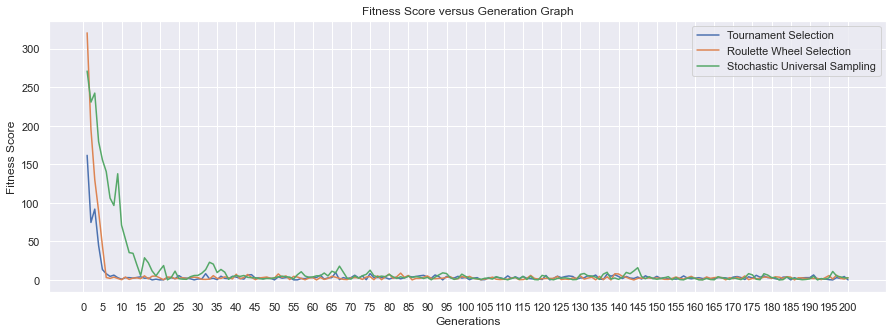

In [10]:
# Visualization
x = [y+1 for y in range(n_generationMod)]
ticks = [y*5 for y in range(n_generationMod)]
ticks = ticks[0:ticks.index(200)+1]

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(x, fitness_historyT, label="Tournament Selection") 
ax.plot(x, fitness_historyR, label="Roulette Wheel Selection")
ax.plot(x, fitness_historyS, label="Stochastic Universal Sampling")
ax.set_xticks(ticks)
ax.legend(loc=0)
ax.set_xlabel("Generations")
ax.set_ylabel("Fitness Score")
ax.set_title('Fitness Score versus Generation Graph');
plt.show() 

## Mutation Methods
Next, three different mutation methods are used. The selection and crossover methods are used from the default version above. The mutation methods are:
* Scramble Mutation
* Swap Mutation
* Inverse Mutation

1.) Scramble Mutation <br>
    As stated in the name scramble, this method first choses a position from the individual list then scramble the number of the position. For example, in the list of [125,503,435,750], index 2 is chosen which is the number of 435, this number will be shuffled into 345/543/534/... A very easy algorithm to implement and relatively fast.
    
2.) Swap Mutation <br>
    This mutation method first randomly choses a position from the individual list same as scramble mutation. Then 2 numbers in the chosen number are swapped in position. For instance, the number 456 is chosen, 2 numbers from 456 is chosen to swap, if 5 and 6 are chosen to swap, then it will become 465. This is also a fairly easy method to implement.
    
3.) Inverse Mutation <br>
    This mutation method also randomly choses a position from the individual list. Then it inverses the chosen number. For example, 537 is chosen. After inversion it becomes 735.

In [11]:
def scramble(mutate, parents):
    for individual in parents:
        if mutate > random.random():
            pos_to_mutate = randint(0, len(individual)-1) # randomly get a position to mutate
            num = individual[pos_to_mutate]  # get the chosen gene
            numInList = [int(a) for a in str(num)] # split into a list and convert to string
            random.shuffle(numInList) # Shuffle the list to 'scramble it'
            while numInList[0] == 0:  # To prevent 350 -> 053
                random.shuffle(numInList)
            s = [str(i) for i in numInList] 
            mutated = int("".join(s)) # join back into a gene
            individual[pos_to_mutate] = mutated # put it back to the individual list
                
    return parents

def swap(mutate, parents):
    for individual in parents:
        if mutate > random.random():
            pos_to_mutate = randint(0, len(individual)-1) # randomly choses a position
            num = individual[pos_to_mutate] 
            numInList = [int(a) for a in str(num)]
            while True:
                f = random.randrange(0,len(numInList)) # randomly select a position of the gene to swap
                s = random.randrange(0,len(numInList)) # randomly select another position of the gene to swap
                if f != s: # if not the same position are chosen, then break
                    break
            # swapping process
            temp = numInList[f] 
            numInList[f] = numInList[s]
            numInList[s] = temp
            
            if numInList[0] == 0: # To prevent 350 -> 053
                for i in numInList[1:]:
                    if i != 0:
                        tem = numInList[0]
                        numInList[0] = i
                        i = numInList[0]
                        break

            st = [str(i) for i in numInList] 
            mutated = int("".join(st))
            individual[pos_to_mutate] = mutated
    
    return parents

def inverse(mutate, parents):
    for individual in parents:
        if mutate > random.random():
            pos_to_mutate = randint(0, len(individual)-1) # randomly choses a position
            num = individual[pos_to_mutate]
            numInList = [int(a) for a in str(num)] 
            numInList.reverse() # inversion process
            if numInList[0] == 0: # To prevent 350 -> 053
                for i in numInList[1:]:
                    if i != 0:
                        tem = numInList[0]
                        numInList[0] = i
                        i = numInList[0]
                        break
            
            st = [str(i) for i in numInList] 
            mutated = int("".join(st))
            individual[pos_to_mutate] = mutated 
        
        return parents

In [12]:
def evolveMod2(pop, target, mutation, retain=0.2,random_select=0.05, mutate=0.01):
    
    # Truncation
    graded = [(fitness(x, target),x) for x in pop]
    graded = [x[1] for x in sorted(graded)] # x[1] because x has two components. 
    # just take the list --> [(50, [41, 38,86, 30, 55])]
    retain_length = int(len(graded)*retain) # how many top % parents to be remained
    parents = graded[0:retain_length] 
    for individual in graded[retain_length:]: 
        if random_select > random.random():
            parents.append(individual)
    
    # crossover
    parents_length = len(parents)
    desired_length = len(pop) - parents_length
    children = []
    while len(children) < desired_length:
        male = randint(0, parents_length-1)
        female = randint(0, parents_length-1)
        if male != female:
            male = parents[male]
            female = parents[female]
            half = int(len(male)/2)
            child = male[:half]+female[half:]
            children.append(child)
    
    parents.extend(children)
    
    # mutate
    if mutation == 1:
        parents = scramble(mutate, parents)
    elif mutation == 2:
        parents = swap(mutate, parents)
    elif mutation == 3:
        parents = inverse(mutate, parents)
        
    return parents

In [13]:
## Run this cell to view for the outputs of the implementation
n_generationMod = 200

## Scrambled Mutation
value_lstSM = []
fitness_historySM = []

p = population(count, days, spots, night_price, spot_price, meal_price, trip_price)

for i in range(n_generationMod):
    p = evolveMod2(p, target,1)
    value = grade(p, target)
    fitness_historySM.append(value)
    value_lstSM.append(p[0])
    value_lstSM.append(value)

summSM = sum(value_lstSM[-2])
finalSM = value_lstSM[-2]

## Swap Mutation
value_lstSwap = []
fitness_historySwap = []

p = population(count, days, spots, night_price, spot_price, meal_price, trip_price)

for i in range(n_generationMod):
    p = evolveMod2(p, target, 2)
    value = grade(p, target)
    fitness_historySwap.append(value)
    value_lstSwap.append(p[0])
    value_lstSwap.append(value)

summSwap = sum(value_lstSwap[-2])
finalSwap = value_lstSwap[-2]

## Inverse Mutation
value_lstI = []
fitness_historyI = []

p = population(count, days, spots, night_price, spot_price, meal_price, trip_price)

for i in range(n_generationMod):
    p = evolveMod2(p, target, 3)
    value = grade(p, target)
    fitness_historyI.append(value)
    value_lstI.append(p[0])
    value_lstI.append(value)

summI = sum(value_lstI[-2])
finalI = value_lstI[-2]

nights = days - 1
print(
"""  
Scrambled Mutation:
Total Expenses: RM {}  
Hotel rental price for total {} nights: RM {} * {} nights
Total {} spots price: RM {}
Total meals price for {} days: RM {}
Total trips price per day: RM {} * {} days
""".format(summSM, nights, finalSM[0]/nights, nights, spots, finalSM[1], days, finalSM[2], finalSM[3]/days, days))

print(
"""  
Swap Mutation:
Total Expenses: RM {}  
Hotel rental price for total {} nights: RM {} * {} nights
Total {} spots price: RM {}
Total meals price for {} days: RM {}
Total trips price per day: RM {} * {} days
""".format(summSwap, nights, finalSwap[0]/nights, nights, spots, finalSwap[1], days, finalSwap[2], finalSwap[3]/days, days))

print(
""" 
Inversed Mutation:
Total Expenses: RM {}  
Hotel rental price for total {} nights: RM {} * {} nights
Total {} spots price: RM {}
Total meals price for {} days: RM {}
Total trips price per day: RM {} * {} days
""".format(summI, nights, finalI[0]/nights, nights, spots, finalI[1], days, finalI[2], finalI[3]/days, days))

  
Scrambled Mutation:
Total Expenses: RM 2000  
Hotel rental price for total 4 nights: RM 150.0 * 4 nights
Total 5 spots price: RM 495
Total meals price for 5 days: RM 130
Total trips price per day: RM 155.0 * 5 days

  
Swap Mutation:
Total Expenses: RM 1999  
Hotel rental price for total 4 nights: RM 132.0 * 4 nights
Total 5 spots price: RM 300
Total meals price for 5 days: RM 160
Total trips price per day: RM 202.2 * 5 days

 
Inversed Mutation:
Total Expenses: RM 1998  
Hotel rental price for total 4 nights: RM 132.0 * 4 nights
Total 5 spots price: RM 405
Total meals price for 5 days: RM 125
Total trips price per day: RM 188.0 * 5 days



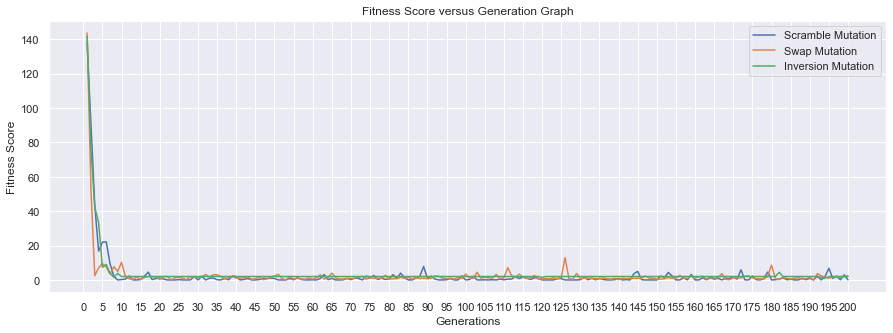

In [14]:
# Visualization
x = [y+1 for y in range(n_generationMod)]
ticks = [y*5 for y in range(n_generationMod)]
ticks = ticks[0:ticks.index(200)+1]

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(x, fitness_historySM, label="Scramble Mutation") 
ax.plot(x, fitness_historySwap, label="Swap Mutation")
ax.plot(x, fitness_historyI, label="Inversion Mutation")
ax.set_xticks(ticks)
ax.legend(loc=0)
ax.set_xlabel("Generations")
ax.set_ylabel("Fitness Score")
ax.set_title('Fitness Score versus Generation Graph');
plt.show() 

## Crossover Methods
Last but not least, three different crossover methods are used. The selection and mutation methods are used from the default version above. The crossover methods are:
* Two-point Crossover
* Multipoints Crossover
* Uniform Crossover

1.) Two-point Crossover <br>
    The first crossover method is Two-point crossover. Instead of split one break point, 2 break points are cut and the genes are crossover with other parent's genes. For example, [500,300,200,100] is father and [600,700,800,900] is mother. Between 500 and 300 is a cut point and between 200 and 100 is a cut point for paternal's list. Whereas for maternal's list, between 600 and 700 is a break point and betweel 800 and 900 is a break point. After crossover, an offspring will have a chromosome of [500,700,800,100]. Break points are randomized.
    
2.) Multipoints Crossover <br>
    For multipoints crossover, it is similar to two points. However, instead of having only 2 points, it will have more than 2 but in this case the maximum points we have will only be 3 because the an individual only has 4 genes which are, [1,2,3,4]. So only maximum of 3 points can be cut. As it is an extension of two points crossover, steps are similar to it.
    
3.) Uniform Crossover <br>
    In this method, division of chromosomes in segments are not needed, instead we treat every gene individually. To decide which gene needs to be crossover in a chromosome, randomization is carried out. If it is 1, father's gene will be used, if  it is 0 then mother's gene will be used. With this, we can crossover each gene uniformly.

In [49]:
def twoPoints(parents, pop):
    parents_length = len(parents) # get parents length
    desired_length = len(pop) - parents_length # get desired length
    children = [] # off sring
    while len(children) < desired_length: # if offspring length is less than desired length
        male = randint(0, parents_length-1) # get father position
        female = randint(0, parents_length-1) # get mother position
        if male != female: # if mom not same as dad
            male = parents[male] # get father individuals
            female = parents[female] # get mother individuals
            pos1 = random.randrange(1, int(len(male))) # position 1 to crossover
            pos2 = random.randrange(1, int(len(male))) # position 2 to crossover
            while pos1 == pos2: # both positions are the same, randomize again 
                pos1 = random.randrange(1, int(len(male))) 
                pos2 = random.randrange(1, int(len(male)))    
            child = [] 
            for i in range(int(len(male))): # cross over at 2 points
                if min(pos1,pos2) <= i < max(pos1,pos2):
                    child.append(male[i]) # crossover father's point     
                else:
                     child.append(female[i]) # crossover mother's point
            children.append(child)
    parents.extend(children)
    return parents

def multipoints(parents, pop):
    parents_length = len(parents)
    desired_length = len(pop) - parents_length
    children = []
    while len(children) < desired_length:
        male = randint(0, parents_length-1)
        female = randint(0, parents_length-1)
        if male != female:
            male = parents[male]
            female = parents[female]
            cutNum = random.randint(2,3) # decide if 2 points or 3 points
            if cutNum == 2: # if there are 2 cuts
                randomlist = [1, 2, 3] # position to cut
                cutPositionList = random.sample(randomlist,cutNum)
                for cutPosition in cutPositionList:
                    male, female = singleCrossover (male, female, cutPosition) # use single cross function to cut the point
            else: # if there are 3 cuts
                for cutPosition in range(3):
                    male, female = singleCrossover (male, female, cutPosition+1)

            children.append(male)
    
    parents.extend(children)
    return parents

def singleCrossover(male, female, cutPosition):
    temp1 = male[:cutPosition]+female[cutPosition:]
    temp2 = female[:cutPosition]+male[cutPosition:]
    return temp1, temp2

def uniform(parents, pop):
    parents_length = len(parents)
    desired_length = len(pop) - parents_length
    children = []
    while len(children) < desired_length:
        male = randint(0, parents_length-1)
        female = randint(0, parents_length-1)
        if male != female:
            male = parents[male]
            female = parents[female]
            child = []
            for i in range(len(male)): # loop thro one of the parent's length
                # In this case, both male and female length are the same
                r = random.randint(0,1) # decide if 0 or 1
                if r == 1: # if 1 = father
                    child.append(male[i])
                else: # if 0 = mother
                    child.append(female[i])
            children.append(child)
    
    parents.extend(children)
    return parents

In [50]:
def evolveMod3(pop, target, crossover, retain=0.2,random_select=0.05, mutate=0.01):
    
    # Truncation
    graded = [(fitness(x, target),x) for x in pop]
    graded = [x[1] for x in sorted(graded)] # x[1] because x has two components. 
    retain_length = int(len(graded)*retain) # how many top % parents to be remained
    parents = graded[0:retain_length] 
    for individual in graded[retain_length:]: 
        if random_select > random.random():
            parents.append(individual)
        
    # crossover
    if crossover == 1:
        parents = twoPoints(parents, pop)
    elif crossover == 2:
        parents = multipoints(parents, pop)
    elif crossover == 3:
        parents = uniform(parents, pop)
        
    # mutate
    for individual in parents:
        if mutate > random.random():
            pos_to_mutate = randint(0, len(individual)-1)
            individual[pos_to_mutate] = randint(min(individual), max(individual))
        
    return parents

In [51]:
## Run this cell to view for the outputs of the implementation
n_generationMod = 200

## Two-points crossover
value_lstTP = []
fitness_historyTP = []

p = population(count, days, spots, night_price, spot_price, meal_price, trip_price)

for i in range(n_generationMod):
    p = evolveMod3(p, target,1)
    value = grade(p, target)
    fitness_historyTP.append(value)
    value_lstTP.append(p[0])
    value_lstTP.append(value)

summTP = sum(value_lstTP[-2])
finalTP = value_lstTP[-2]

## Multipoints crossover
value_lstUN = []
fitness_historyUN = []

p = population(count, days, spots, night_price, spot_price, meal_price, trip_price)

for i in range(n_generationMod):
    p = evolveMod3(p, target,2)
    value = grade(p, target)
    fitness_historyUN.append(value)
    value_lstUN.append(p[0])
    value_lstUN.append(value)

summUN = sum(value_lstUN[-2])
finalUN = value_lstUN[-2]

## Uniform crossover
value_lstFL = []
fitness_historyFL = []

p = population(count, days, spots, night_price, spot_price, meal_price, trip_price)

for i in range(n_generationMod):
    p = evolveMod3(p, target, 3)
    value = grade(p, target)
    fitness_historyFL.append(value)
    value_lstFL.append(p[0])
    value_lstFL.append(value)

summFL = sum(value_lstFL[-2])
finalFL = value_lstFL[-2]

nights = days - 1
print(
"""  
Two-points Crossover:
Total Expenses: RM {}  
Hotel rental price for total {} nights: RM {} * {} nights
Total {} spots price: RM {}
Total meals price for {} days: RM {}
Total trips price per day: RM {} * {} days
""".format(summTP, nights, finalTP[0]/nights, nights, spots, finalTP[1], days, finalTP[2], finalTP[3]/days, days))

print(
"""  
Multipoints Crossover:
Total Expenses: RM {}  
Hotel rental price for total {} nights: RM {} * {} nights
Total {} spots price: RM {}
Total meals price for {} days: RM {}
Total trips price per day: RM {} * {} days
""".format(summUN, nights, finalUN[0]/nights, nights, spots, finalUN[1], days, finalUN[2], finalUN[3]/days, days))

print(
"""  
Uniform Crossover:
Total Expenses: RM {}  
Hotel rental price for total {} nights: RM {} * {} nights
Total {} spots price: RM {}
Total meals price for {} days: RM {}
Total trips price per day: RM {} * {} days
""".format(summFL, nights, finalFL[0]/nights, nights, spots, finalFL[1], days, finalFL[2], finalFL[3]/days, days))

  
Two-points Crossover:
Total Expenses: RM 2000  
Hotel rental price for total 4 nights: RM 135.0 * 4 nights
Total 5 spots price: RM 400
Total meals price for 5 days: RM 185
Total trips price per day: RM 175.0 * 5 days

  
Multipoints Crossover:
Total Expenses: RM 2000  
Hotel rental price for total 4 nights: RM 133.75 * 4 nights
Total 5 spots price: RM 435
Total meals price for 5 days: RM 215
Total trips price per day: RM 163.0 * 5 days

  
Uniform Crossover:
Total Expenses: RM 2000  
Hotel rental price for total 4 nights: RM 125.0 * 4 nights
Total 5 spots price: RM 435
Total meals price for 5 days: RM 140
Total trips price per day: RM 185.0 * 5 days



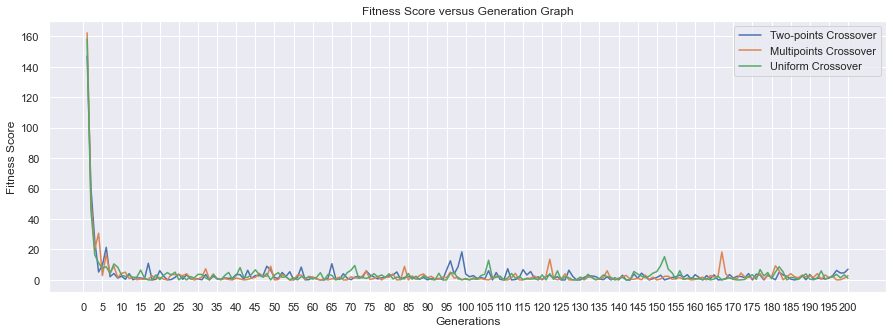

In [53]:
# Visualization
x = [y+1 for y in range(n_generationMod)]
ticks = [y*5 for y in range(n_generationMod)]
ticks = ticks[0:ticks.index(200)+1]

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(x, fitness_historyTP, label="Two-points Crossover") 
ax.plot(x, fitness_historyUN, label="Multipoints Crossover")
ax.plot(x, fitness_historyFL, label="Uniform Crossover")
ax.set_xticks(ticks)
ax.legend(loc=0)
ax.set_xlabel("Generations")
ax.set_ylabel("Fitness Score")
ax.set_title('Fitness Score versus Generation Graph');
plt.show() 